Sales Dataset Head:
          Date  Day     Month  Year  Customer_Age       Age_Group  \
0  11/26/2013   26  November  2013            19     Youth (<25)   
1  11/26/2015   26  November  2015            19     Youth (<25)   
2   3/23/2014   23     March  2014            49  Adults (35-64)   
3   3/23/2016   23     March  2016            49  Adults (35-64)   
4   5/15/2014   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country            Region Product_Category    Category  \
0               M     Canada  British Columbia      Accessories  Bike Racks   
1               M     Canada  British Columbia      Accessories  Bike Racks   
2               M  Australia   New South Wales      Accessories  Bike Racks   
3               M  Australia   New South Wales      Accessories  Bike Racks   
4               F  Australia   New South Wales      Accessories  Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
0  Hitch Rack - 4-Bike

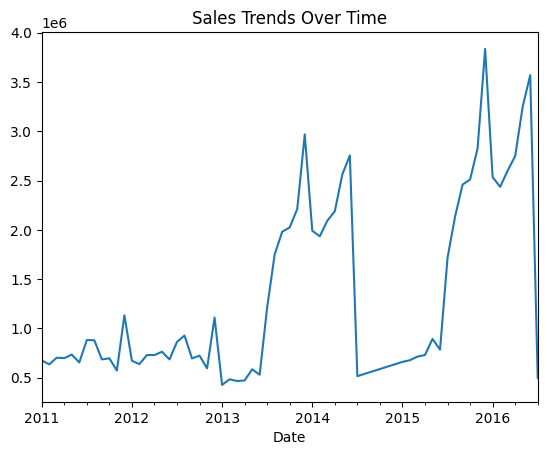

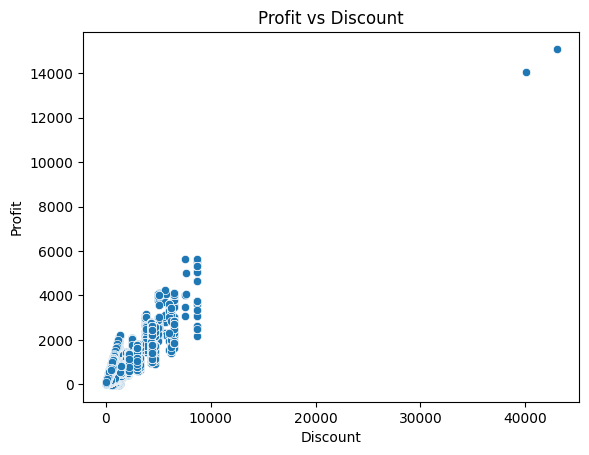

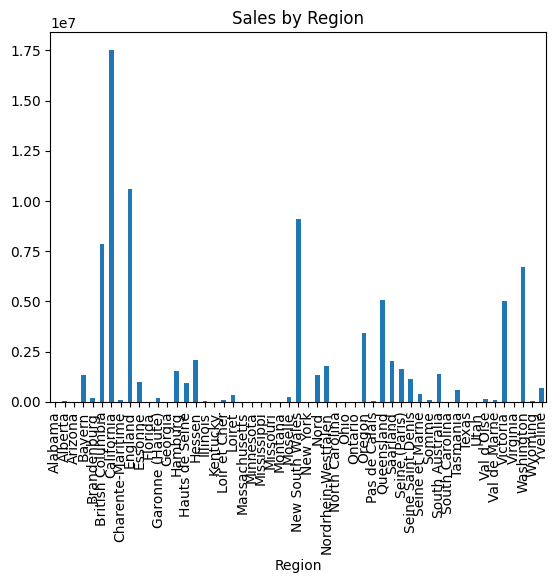

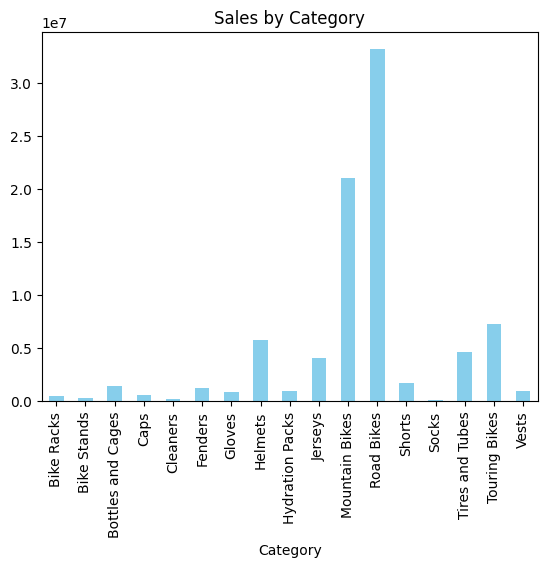

Model R² Score: 1.0
Model Mean Squared Error: 5.170464358236643e-24


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("sales_data.csv")

# Preview the data
print("Sales Dataset Head:\n", df.head())

# Initial inspection
print(df.info())
print(df.describe())

# Data Cleaning
df.drop_duplicates(inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Exploratory Data Analysis
# Time Series Analysis
df.groupby(df['Date'].dt.to_period("M"))['Sales'].sum().plot(kind="line")
plt.title("Sales Trends Over Time")
plt.show()

# Scatter Plot: Profit vs Discount
sns.scatterplot(x=df['Discount'], y=df['Profit'])
plt.title("Profit vs Discount")
plt.show()

# Bar Plot: Sales by Region
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Region")
plt.show()

# Bar Plot: Sales by Category
df.groupby('Category')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title("Sales by Category")
plt.show()

# Predictive Modeling
# Feature Selection
X = df[['Profit', 'Discount']]
y = df['Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print("Model R² Score:", r2_score(y_test, y_pred))
print("Model Mean Squared Error:", mean_squared_error(y_test, y_pred))